<a href="https://colab.research.google.com/github/Huyvubk/Math/blob/main/Streore_Matching_using_cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HW1

Viết chương trình tìm kiếm **n** ảnh (trong tập fruit datasset) có đặc điểm tương tự với ảnh input nhất. Sử dụng cosine similarity để so sánh các ảnh với nhau.

VD:

Input: test image 

Ouput: top **n**=5 ảnh có đặc điểm tương tự như như atnh test image

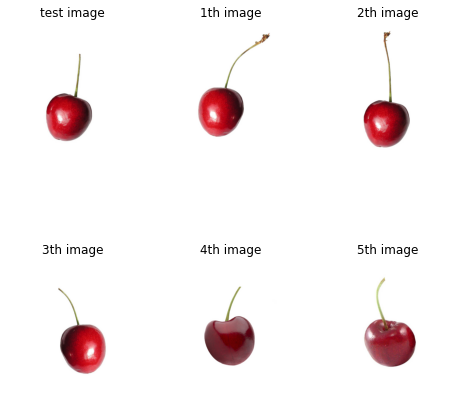

-------------------------------------------------
**SOLUTION**

- **Step1:** Tạo hàm tính cosine similarity cho 2 ảnh để so sánh 
- **Step2:** Tính histogram cho toàn bộ ảnh 
- **Step3:** Tính histogram cho ảnh test và dùng histogram này tính độ tương đồng (dùng cosine similarity) với các ảnh trong tập dataset.
- **Step4:** Lấy n (num_img) ảnh có giá trị cosine similarity lớn nhất. Thực tế cần lấy num_img+1 do mình dùng ảnh test trong data nên ảnh có giá trị cao nhất chính là ảnh test

In [2]:
!gdown --id "1TJIzqn6q7WPB8oCMbb4Ye9WFdVTzjWDT"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TJIzqn6q7WPB8oCMbb4Ye9WFdVTzjWDT
To: /content/fruits.zip
100% 13.2M/13.2M [00:00<00:00, 169MB/s]


In [3]:
!unzip "/content/fruits.zip"

Archive:  /content/fruits.zip
   creating: fruits/
  inflating: fruits/1 (1).jpg        
  inflating: fruits/1 (10).jpg       
  inflating: fruits/1 (100).jpg      
  inflating: fruits/1 (101).jpg      
  inflating: fruits/1 (102).jpg      
  inflating: fruits/1 (103).jpg      
  inflating: fruits/1 (104).jpg      
  inflating: fruits/1 (105).jpg      
  inflating: fruits/1 (106).jpg      
  inflating: fruits/1 (107).jpg      
  inflating: fruits/1 (108).jpg      
  inflating: fruits/1 (109).jpg      
  inflating: fruits/1 (11).jpg       
  inflating: fruits/1 (110).jpg      
  inflating: fruits/1 (111).jpg      
  inflating: fruits/1 (112).jpg      
  inflating: fruits/1 (113).jpg      
  inflating: fruits/1 (114).jpg      
  inflating: fruits/1 (115).jpg      
  inflating: fruits/1 (116).jpg      
  inflating: fruits/1 (117).jpg      
  inflating: fruits/1 (118).jpg      
  inflating: fruits/1 (119).jpg      
  inflating: fruits/1 (12).jpg       
  inflating: fruits/1 (120).jpg      

In [4]:
data_path = "/content/fruits"

In [5]:
import cv2
import numpy as np
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
def cal_hist(image):
    rez_image = cv2.resize(image, (600,600))
    gray_image = cv2.cvtColor(rez_image, cv2.COLOR_BGR2GRAY)
    histogram = cv2.calcHist([gray_image], [0],
                         None, [256], [0, 256])
    return histogram

def cal_cos_sim(image1, image2):
    a = image1.flatten()
    b = image2.flatten()
    cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim

def find_similar_imgs(test_image_path, images_dir, num_img=5):
    # Tính histogram cho toàn bộ tập data 
    list_img_path = np.array(os.listdir(images_dir))
    list_hist_img = [cal_hist(cv2.imread(os.path.join(images_dir, img_path))) for img_path in list_img_path]

    # Tính histogram cho ảnh test
    test_image = cv2.imread(test_image_path)
    hist_test_image = cal_hist(test_image)
    
    # Tính cosine similarity giữa ảnh test với toàn bộ ảnh trong dataset
    # Sắp xếp cosine similarity và lấy các n (num_img) ảnh có giá trị lớn nhất 
    list_scores = [cal_cos_sim(hist_test_image, hist_img) for hist_img in list_hist_img]
    
    # Sắp xếp từ bé đên lớn dùng [::-1] để đảo ngược từ lớn đến bé 
    # Lấy num_img+1 do ở đây mình lấy ảnh test trong tập data nên ảnh có cosine similarity lớn nhất chính là ảnh đó
    top_similar_images = np.argsort(list_scores)[::-1][:num_img+1]
    # print(np.array(list_scores)[top_similar_images])

    return list_img_path[top_similar_images]




1 (104).jpg
1 (56).jpg
1 (79).jpg
1 (153).jpg
1 (57).jpg
1 (106).jpg


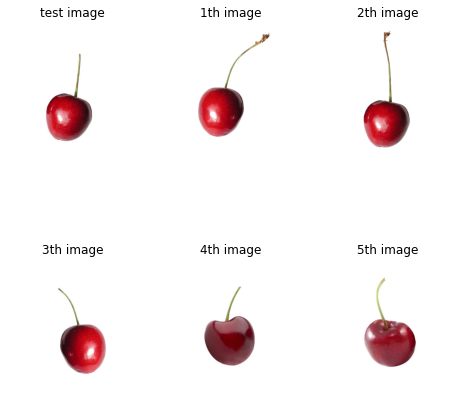

In [6]:
test_image_path = '/content/fruits/1 (104).jpg'
images_dir = '/content/fruits/'
num_img = 5
top_similar_images_path = find_similar_imgs(test_image_path, images_dir, num_img=num_img)
# print(top_similar_images_path)
fig = plt.figure(figsize=(8,8))

for idx_img, img_path in enumerate(top_similar_images_path):
    fig.add_subplot(2,3, idx_img+1)
    if idx_img ==0:
        name = 'test image'
    else:
        name = "{}th image".format(idx_img)
    plt.title(name)
    plt.axis('off')
    print(img_path)
    img = cv2.imread(os.path.join(images_dir, img_path))
    plt.imshow(img[...,::-1])
plt.show()


## HW2

Viết một function trả về disparity map từ 2 ảnh đầu vào (left và right image) dựa trên các stereo matching algorithm sau:
- SAD (Sum of Absolute Differences)
- SSD (Sum of Squred Differences)
- Cosine similarity 

Input: left image, right image, maximum disparity, windown size và tên thuật toán

Output: Disparity map 

- Khi tăng windown size thì việc gì sẽ xảy ra?
- Kết quả của SAD và SSD có gì khác nhau?



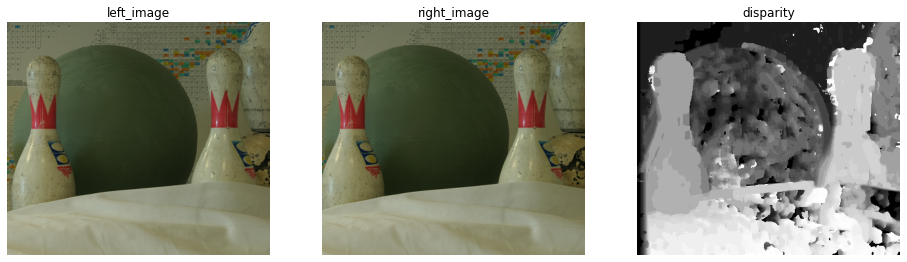

Thuật toán của stereo matching:

$d_p =  \underset{d \in D}{\mathrm{argmin}}(C(p,q))$ cho SAD và SSD 

$d_p =  \underset{d \in D}{\mathrm{argmax}}(C(p,q))$ cho cosine similarity 

$q = (x_p - d, y_p)$

- **SAD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}|L(u)-R(v)|$ 

- **SSD**: $C(p,q) =  \underset{(u,v) \in (W_p,W_q)}{\sum}(L(u)-R(v))^2$ 

- **Cosine similarity**: $C(p,q) =  cs(W_p, W_q)$ 

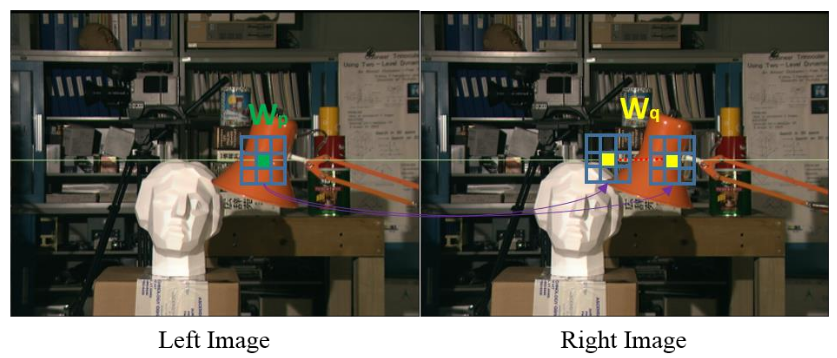

--------------------------------------------------------
**SOLUTION**

- **Step1**: Tiền xử lý ảnh (chuyển sang ảnh gray, giảm nhiễu, ...)
- **Step2:** Khởi tạo disparity_maps có d (maximum disparity) channel với mỗi channel có kích thước bằng ảnh input. 
- **Step3:** Xây dựng các thuật toán cho SAD, SSD, và cosine similarity dựa theo công thức.
- **Step4:** Mỗi channel trong disparity_maps là kết quả của ảnh left so với ảnh right khi shift từ trái sang phải từ 0 đến d dựa trên SAD hoặc SSD hoặc cosine similarity. Mỗi channel trong disparity_maps tương ứng khi shift ảnh right (d)
- **Step5** dựa vào disparity_maps sẽ tính max hoặc min theo chiều d (tùy thuộc thuật toán sử dụng SAD và SSD là min trong khi cosine similarity là max) để lấy được disparity map thực sự

- Khi tăng windown size thì việc gì sẽ xảy ra? window quá nhỏ sẽ ít thông tin hơn trong việc tìm điểm tương đồng giữa các vị trí (do ít đặc trưng). Tuy nhiên window quá lớn sẽ làm chứa nhiều thông tin không cần thết làm sai lệch kết qủa
- Kết quả của SAD và SSD có gì khác nhau? SSD thường sẽ cho kết quả tốt hơn SAD bỏi vị một sự khác biệt nhỏ sẽ được làm lớn lên do bình phương giá trị, do đó vị trị 2 pixel tương đồng sẽ đuuợc tìm tốt hơn. Tuy nhiên SAD sẽ ít bị ảnh hưởng bởi nhiễu có giá trị lớn (outlier) hơn là SSD, vì các outlier trong SDD đã được bình phương lên.


In [7]:
!gdown --id "1f1gnkuO5nn7QLYcONZx7xbodj7ynVoPi"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1f1gnkuO5nn7QLYcONZx7xbodj7ynVoPi
To: /content/left.png
100% 254k/254k [00:00<00:00, 79.2MB/s]


In [8]:
!gdown --id "1rc7Tjj1kVU-01f2G_idx9nRntiKNdCtw"

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rc7Tjj1kVU-01f2G_idx9nRntiKNdCtw
To: /content/right.png
100% 254k/254k [00:00<00:00, 111MB/s]


In [9]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt
%matplotlib inline 


def preprocess_frame(path):
    orig_image = cv2.imread(path)
    gray_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(gray_image)
    image = cv2.GaussianBlur(image, (5, 5), 0)
    return orig_image, image

def calculate_disparity_matrix(left_image_path, right_image_path, maximum_disparity, windown_size, algorithm_name):
    # Tiền xử lý giảm nhiễu 
    orig_left_image, left_image = preprocess_frame(left_image_path)
    orig_right_image, right_image = preprocess_frame(right_image_path)
    
    # tạo kernel (sliding window) 
    kernel = np.ones([windown_size, windown_size])

    # Tạo ra disparity_maps có channels = d (maximum_disparity)
    disparity_maps = np.zeros(
        [left_image.shape[0], left_image.shape[1], maximum_disparity])
    
    for d in range(0, maximum_disparity):
        # shift ảnh right_image từ trái sang phải max step là d theo chiều x
        translation_matrix = np.float32([[1, 0, d], [0, 1, 0]])
        shifted_image = cv2.warpAffine(
            right_image, translation_matrix,
            (right_image.shape[1], right_image.shape[0]))
        
        if algorithm_name == 'SAD':
            # Tính abs differences với từng ảnh được shift 
            SAD = abs(np.float32(left_image) - np.float32(shifted_image))
            # Dùng kernel để tính SAD cho mỗi điểm ảnh
            filtered_image = cv2.filter2D(SAD, -1, kernel)
        elif algorithm_name == 'SSD':
            # calculate squared differences
            SSD = np.float32(left_image) - np.float32(shifted_image)
            SSD = SSD**2
            # Dùng kernel để tính SSD cho mỗi điểm ảnh
            filtered_image = cv2.filter2D(SSD, -1, kernel)

        elif algorithm_name == 'Cosine similarity':
            # Tính dot product của 2 ảnh 
            multiplied_matrix = np.float32(left_image) * np.float32(shifted_image)
            numerator = cv2.filter2D(multiplied_matrix, -1, kernel)
            
            # tính tích norm 2 của 2 ảnh 
            squared_norm_left = cv2.filter2D(np.float32(left_image)**2, -1, kernel)
            squared_norm_shifted = cv2.filter2D(np.float32(shifted_image)**2, -1, kernel)
            denominator = np.sqrt(squared_norm_left*squared_norm_shifted) + 1e-6
            
            # Tính cosine similarity cho từng điểm ảnh 
            filtered_image = numerator/denominator

        else:
            raise Exception('Wrong Algorithm Name')

        disparity_maps[:, :, d] = filtered_image

    if algorithm_name == 'Cosine similarity':
        # cosine similarity cần tìm max (giống nhau nhất)
        disparity = np.argmax(disparity_maps, axis=2)
        # Scale về giá trị ảnh thực 
        disparity = np.uint8(disparity * 255 / maximum_disparity)
        disparity = cv2.equalizeHist(disparity)
    else:
        # SAD, SSD cần tìm min (giống nhau nhất)
        disparity = np.argmin(disparity_maps, axis=2)
        # Scale về giá trị ảnh thực 
        disparity = np.uint8(disparity * 255 / maximum_disparity)
        disparity = cv2.equalizeHist(disparity)

    return orig_left_image, orig_right_image, disparity

    

# Sử dụng opencv 
# def calculate_disparity_inbuilt(args):
#     left_image = preprocess_frame(args[1])
#     right_image = preprocess_frame(args[2])
#     rows, cols = left_image.shape
#     stereo = cv2.StereoBM_create(numDisparities=maximum_disparity,
#                                  blockSize=windown_size)
#     disparity = stereo.compute(left_image, right_image)
#     plt.imshow(disparity, cmap='gray', vmin=0, vmax=255)
#     plt.show()

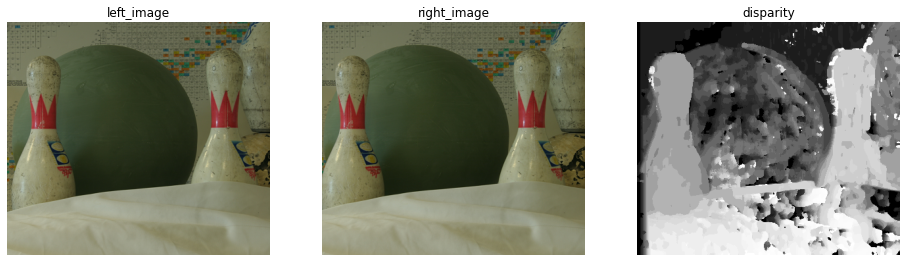

In [10]:
left_image_path = "/content/left.png"
right_image_path = "/content/right.png"
maximum_disparity = 64  
windown_size = 9  
# algorithm_name = 'Cosine similarity'
algorithm_name = "SAD"
orig_left_image, orig_right_image, disparity = calculate_disparity_matrix(left_image_path, 
                                                                           right_image_path,
                                                                           maximum_disparity, 
                                                                           windown_size, 
                                                                           algorithm_name)
fig = plt.figure(figsize=(16,16))
fig.add_subplot(1,3,1)
plt.title('left_image')
plt.axis('off')
plt.imshow(orig_left_image[...,::-1])

fig.add_subplot(1,3,2)
plt.title('right_image')
plt.axis('off')
plt.imshow(orig_right_image[...,::-1])

fig.add_subplot(1,3,3)
plt.title('disparity')
plt.axis('off')
plt.imshow(disparity, cmap='gray', vmin=0, vmax=255)


plt.show()